<a href="https://colab.research.google.com/github/Muna13592/prediction/blob/main/prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving country_wise_latest.csv to country_wise_latest (4).csv
         Country/Region  Confirmed  ...  1 week % increase             WHO Region
0           Afghanistan      36263  ...               2.07  Eastern Mediterranean
1               Albania       4880  ...              17.00                 Europe
2               Algeria      27973  ...              18.07                 Africa
3               Andorra        907  ...               2.60                 Europe
4                Angola        950  ...              26.84                 Africa
..                  ...        ...  ...                ...                    ...
182  West Bank and Gaza      10621  ...              19.12  Eastern Mediterranean
183      Western Sahara         10  ...               0.00                 Africa
184               Yemen       1691  ...               4.45  Eastern Mediterranean
185              Zambia       4552  ...              36.86                 Africa
186            Zimbabwe       2704  

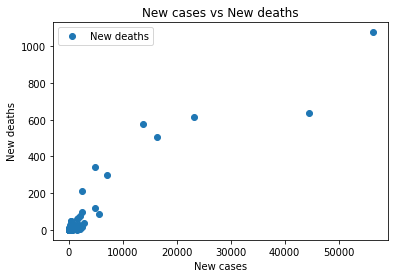

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[6.81108985]
[[0.01442695]]


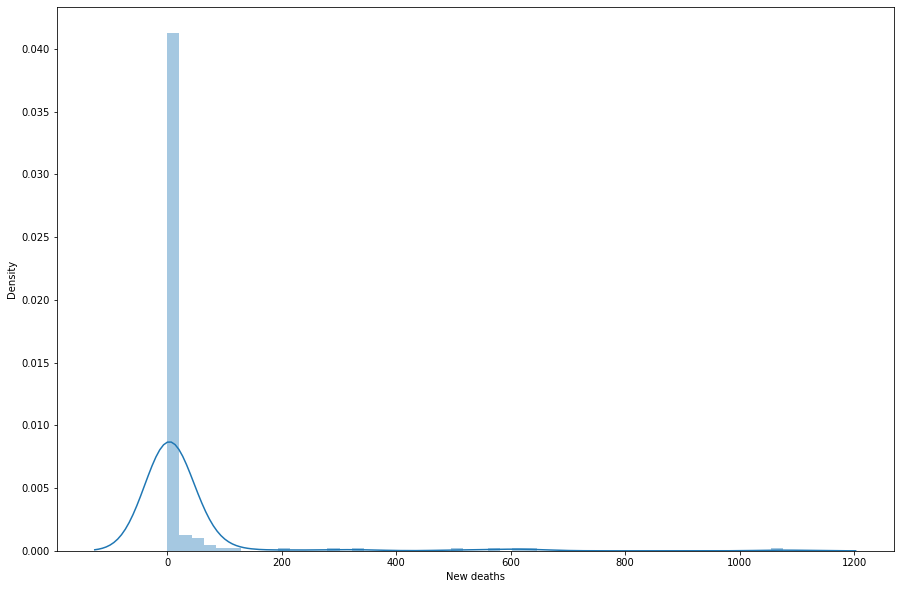

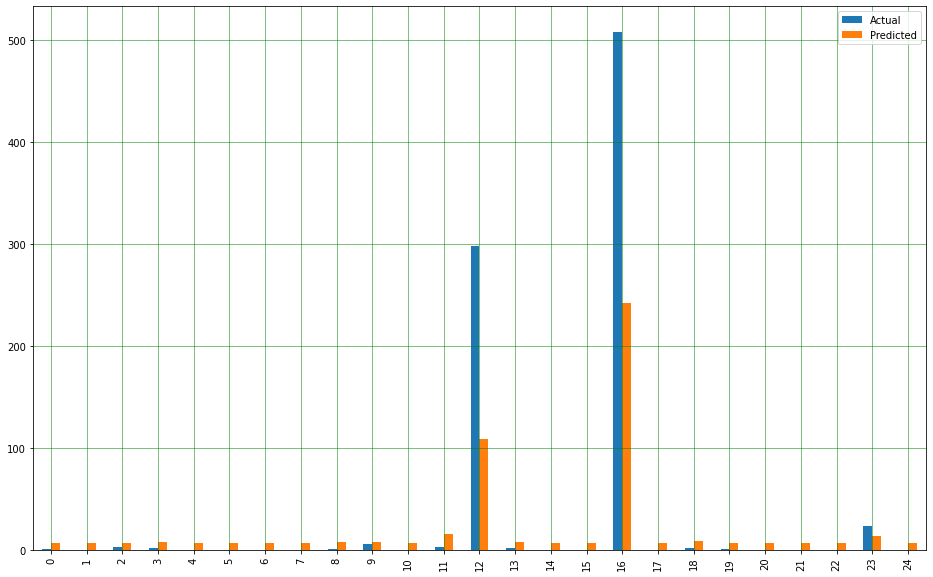

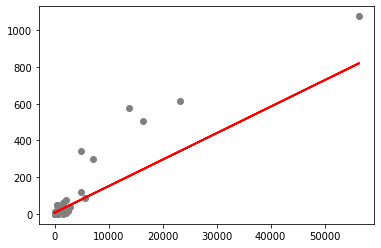

Mean Absolute Error: 19.07856583176875
Mean Squared Error: 3128.7370431756726
Root Mean Squared Error: 55.93511458087551


In [ ]:
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

from google.colab import files
uploaded = files.upload()

df2 = pd.read_csv(io.BytesIO(uploaded['country_wise_latest.csv']))
print(df2)
df2.shape
df2.describe()
df2.plot(x='New cases', y='New deaths', style='o')
plt.title('New cases vs New deaths')
plt.xlabel('New cases')
plt.ylabel('New deaths')
plt.show()
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(df2['New deaths'])
X = df2['New cases'].values.reshape(-1,1)
y = df2['New deaths'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train) #training the algorithm
#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))